In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# import os
# import time
# import numpy as np
# import librosa
# lst = []

# start_time = time.time()
# for folder in os.listdir('.'):
#   if folder[0]=='A':
#     for file in os.listdir(folder):
#         try:
#           X, sample_rate = librosa.load(os.path.join(folder,file), res_type='kaiser_fast')
#           mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
#           file = int(file[7:8]) - 1 
#           arr = mfccs, file
#           lst.append(arr)
#         except ValueError:
#           continue

# print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 236.32492113113403 seconds ---


In [0]:
# X, y = zip(*lst)


In [0]:
# import numpy as np
# X = np.asarray(X)
# y = np.asarray(y)


# X.shape, y.shape



((1440, 40), (1440,))

In [0]:
# !pip install oblib
# import joblib

# X_name = 'X.joblib'
# y_name = 'y.joblib'
# save_dir = '/content/drive/My Drive/ravdess_model'

# savedX = joblib.dump(X, os.path.join(save_dir, X_name))
# savedy = joblib.dump(y, os.path.join(save_dir, y_name))


import numpy as np
import joblib
# np.save('gdrive/My Drive/ravdess_model/x',X)
# np.save('gdrive/My Drive/ravdess_model/y',y)

X = joblib.load('gdrive/My Drive/ravdess_model/X.joblib')
y = joblib.load('gdrive/My Drive/ravdess_model/y.joblib')

# for i in range(len(y)):
#   if y[i]>0:
#     y[i]-=1



# array_rain_fall = np.loadtxt(fname="rain-fall.csv", delimiter=",")
# np.savetxt(fname="saved-rain-fall-row-col-names.csv", delimiter=",", X=array_rain_fall)

In [0]:
import pandas as pd
columns = range(len(y))
df = pd.DataFrame(X)

In [0]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
4943,-646.931546,61.377081,-16.988777,12.555034,-13.093199,3.082647,-11.279306,-10.540529,-9.113195,2.369075,-8.408164,-1.000017,-9.220102,0.270728,-4.869185,-3.798038,-4.465536,-2.551504,-6.219362,-2.610812,-3.215108,-4.511744,-6.140197,-2.663885,-3.467748,-2.806494,-0.882522,-1.555897,2.077955,1.014428,-0.226662,1.816127,0.245245,2.198746,2.465535,2.617508,1.774237,0.930601,0.747460,1.498267
4944,-675.536781,48.541577,-3.693695,15.501362,-7.372083,-1.366871,-14.761905,-5.579250,-5.142587,-1.491627,-10.421262,-1.190409,-2.440685,-4.300209,-3.974783,-3.007353,-5.499747,-0.201112,-6.016098,-2.445127,-3.699853,-3.571032,-3.403845,-5.400430,-3.425282,-1.115717,1.684772,2.438847,2.609585,1.804672,-0.563119,1.706292,0.030133,1.093912,0.216716,1.608424,-1.338693,0.192503,-0.731679,1.501951
4945,-608.778315,59.247194,-6.208647,10.505940,-10.760311,2.287540,-14.015711,-9.075580,-8.449490,4.014549,-10.895445,-3.131255,-2.431987,-2.044737,-5.594034,-2.888829,-7.209847,-3.264448,-5.759219,-1.175307,-3.472448,-3.047401,-3.885690,-4.228245,-4.744638,-1.849893,-2.489592,-1.204477,-2.144263,-2.033505,-1.972012,-0.051326,-1.002053,-0.190803,0.205867,2.353034,3.459262,3.242251,2.071721,2.525186
4946,-560.837177,50.168745,-19.705780,4.857206,-14.152938,-1.806413,-14.607022,-10.531889,-8.830826,1.842285,-10.997461,3.024669,-11.034260,0.173616,-5.544484,-4.531592,-1.218367,-4.226231,-7.439676,-2.918094,-4.972704,-4.242082,-4.365048,-2.168633,-3.950433,-0.162558,2.696078,3.357330,4.228732,5.612513,6.008360,8.070698,5.162092,4.522226,2.342330,0.923058,1.369484,1.216854,0.766931,0.479213
4947,-606.634919,61.005785,-24.945132,13.234665,-5.295787,-4.091784,-7.111942,-8.966161,-10.679787,3.256634,-9.203079,2.093423,-12.159755,-1.357020,-2.136598,-7.099506,-7.953842,-1.035362,-5.483356,-2.363346,-0.067038,1.916906,-0.763467,2.335582,-1.165362,1.852167,0.116237,2.224703,2.673086,6.556891,5.686625,7.073574,7.005492,8.724262,6.402209,3.748414,0.912942,0.379323,0.921929,1.557195


In [0]:
from fastai.basics import *
from fastai.vision import *
from sklearn.model_selection import train_test_split
import torch

class ArrayDataset(Dataset):
    "Sample numpy array dataset"
    def __init__(self, x, y):
        self.x, self.y = x, y
        self.c = 2 # binary label
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, i):
        return self.x[i], self.y[i]
      


    
train_X,valid_X, train_y, valid_y = train_test_split(df,y,test_size=0.2,random_state=42)
x_traincnn = np.expand_dims(train_X, axis=2)
x_validcnn = np.expand_dims(valid_X, axis=2)
# X = np.expand_dims(X,axis=2)
print(train_y,valid_y)
# Load necessary Pytorch packages
# from torch.utils.data import DataLoader, TensorDataset
# from torch import Tensor

# # Create dataset from several tensors with matching first dimension
# # Samples will be drawn from the first dimension (rows)
# train_dataset = TensorDataset( Tensor(x_traincnn), Tensor(train_y) )
# valid_dataset = TensorDataset( Tensor(x_validcnn), Tensor(valid_y) )
# # Create a data loader from the dataset
# # Type of sampling and batch size are specified at this step
# train_loader = DataLoader(train_dataset, batch_size= 16, shuffle=True)
# valid_loader = DataLoader(valid_dataset, batch_size= 16, shuffle=True)

# # Quick test
# next(iter(train_loader))





# x_traincnn = torch.Tensor([x_traincnn,train_y])
# x_testcnn = torch.Tensor([x_testcnn,valid_y])
# # print(type(x_traincnn))
# print(x_traincnn)
# train_set,valid_set = ArrayDataset(train_X,train_y),ArrayDataset(valid_X,valid_y)

# train_data = []
# valid_data = []
# for i in range(len(train_X)):
#    train_data.append([train_X[i], train_y[i]])
# for i in range(len(valid_X)):
#    valid_data.append([valid_X[i], valid_y[i]])
    
    
# train_data = np.array(train_data)
# valid_data = np.array(valid_data)


# train_data = np.expand_dims(train_data, axis=2)
# valid_data = np.expand_dims(valid_data, axis=2)

# print(train_data.shape)

trainloader = torch.utils.data.DataLoader(x_traincnn, batch_size=16,
                                          shuffle=True, num_workers=2)
validloader = torch.utils.data.DataLoader(x_validcnn, batch_size=16,
                                          shuffle=True, num_workers=2)




[4 3 3 5 ... 3 2 2 5] [1 4 3 0 ... 2 3 1 5]


In [0]:
def conv(ni,nf): return nn.Conv1d(ni, nf, kernel_size=3, stride=2, padding=1)

In [0]:
model = nn.Sequential(
    conv(1, 8), # 14
    nn.BatchNorm2d(8),
    nn.ReLU(),
    conv(8, 16), # 7
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 32), # 4
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32, 16), # 2
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 8), # 1
    nn.BatchNorm2d(8),
    Flatten(),   # remove (1,1) grid
)

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

In [0]:
model.cuda()

Sequential(
  (0): Conv1d(1, 8, kernel_size=(3,), stride=(2,), padding=(1,))
  (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Conv1d(8, 16, kernel_size=(3,), stride=(2,), padding=(1,))
  (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Conv1d(16, 32, kernel_size=(3,), stride=(2,), padding=(1,))
  (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU()
  (9): Conv1d(32, 16, kernel_size=(3,), stride=(2,), padding=(1,))
  (10): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU()
  (12): Conv1d(16, 8, kernel_size=(3,), stride=(2,), padding=(1,))
  (13): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): Flatten()
)

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

In [0]:
batch_size = 10
#3958
i=0
while i<3950:
  inputs,labels = x_traincnn[i:(i+batch_size)],train_y[i:(i+batch_size)]
  inputs = torch.from_numpy(inputs)
  labels = torch.from_numpy(labels)
  print(inputs.shape,labels.shape)
  i+=10

In [0]:
for epoch in range(10):  # loop over the dataset multiple times
  running_loss = 0.0
  batch_size = 10
  #3958
  i=0
  while i<3950:
    # zero the parameter gradients
    optimizer.zero_grad()
    inputs,labels = x_traincnn[i:(i+batch_size)],train_y[i:(i+batch_size)]
    inputs = torch.from_numpy(inputs)
    labels = torch.from_numpy(labels)
    # forward + backward + optimize
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    i+=10
# print statistics
    running_loss += loss.item()
    if i % 100 == 99:    # print every 2000 mini-batches
      print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0

print('Finished Training')

torch.Size([10, 40, 1]) torch.Size([10])


RuntimeError: ignored

In [0]:
class resblock(Layer):
    def __init__(self,nf, **kwargs):
        super(resblock, self).__init__()


    def call(self, nf, nf):
      
      

    def get_config(self):
        config = {
            'axis': self.axis,
            'momentum': self.momentum,
            'epsilon': self.epsilon,
            'center': self.center,
            'scale': self.scale,
            'beta_initializer': initializers.serialize(self.beta_initializer),
            'gamma_initializer': initializers.serialize(self.gamma_initializer),
            'moving_mean_initializer':
                initializers.serialize(self.moving_mean_initializer),
            'moving_variance_initializer':
                initializers.serialize(self.moving_variance_initializer),
            'beta_regularizer': regularizers.serialize(self.beta_regularizer),
            'gamma_regularizer': regularizers.serialize(self.gamma_regularizer),
            'beta_constraint': constraints.serialize(self.beta_constraint),
            'gamma_constraint': constraints.serialize(self.gamma_constraint)
        }
        base_config = super(BatchNormalization, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    def compute_output_shape(self, input_shape):
        return input_shape

In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint



model = Sequential()

model.add(Conv1D(32, 5,strides=2,padding='same',input_shape=(40,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
# model.add(x)
# model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 5,strides=2,padding='same')
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv1D(8, 5,strides=2,padding='same',))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(Dense(7))

opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [0]:
BatchNormalization??

In [0]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 20, 32)            192       
_________________________________________________________________
activation_1 (Activation)    (None, 20, 32)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 32)            128       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 64)            10304     
_________________________________________________________________
activation_2 (Activation)    (None, 10, 64)            0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 64)            256       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 5, 8)             

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [0]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
cnnhistory=model.fit(x_traincnn, train_y, batch_size=16, epochs=100, validation_data=(x_validcnn, valid_y))

Train on 3958 samples, validate on 990 samples
Epoch 1/100
3958/3958 [==============================] - 1s 246us/step - loss: 0.0167 - acc: 0.9932 - val_loss: 0.2625 - val_acc: 0.9495
Epoch 2/100
3958/3958 [==============================] - 1s 257us/step - loss: 0.0237 - acc: 0.9922 - val_loss: 0.2904 - val_acc: 0.9434
Epoch 3/100
3958/3958 [==============================] - 1s 238us/step - loss: 0.0283 - acc: 0.9914 - val_loss: 0.2562 - val_acc: 0.9495
Epoch 4/100
3958/3958 [==============================] - 1s 242us/step - loss: 0.0461 - acc: 0.9879 - val_loss: 0.2891 - val_acc: 0.9505
Epoch 5/100
3958/3958 [==============================] - 1s 250us/step - loss: 0.0460 - acc: 0.9826 - val_loss: 0.2645 - val_acc: 0.9525
Epoch 6/100
3958/3958 [==============================] - 1s 248us/step - loss: 0.0305 - acc: 0.9912 - val_loss: 0.2620 - val_acc: 0.9535
Epoch 7/100
3958/3958 [==============================] - 1s 250us/step - loss: 0.0199 - acc: 0.9939 - val_loss: 0.2755 - val_acc: 0

In [0]:
model_name = 'OnlyNeutral_Emotion_Voice_Detection_Model.h5'
save_dir = 'gdrive/My Drive/ravdess_model'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at gdrive/My Drive/ravdess_model/OnlyNeutral_Emotion_Voice_Detection_Model.h5 


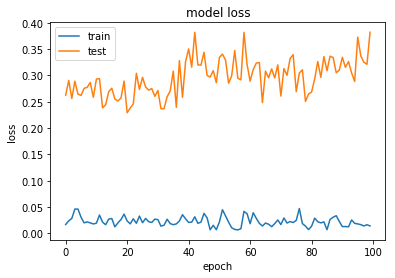

In [0]:
import matplotlib.pyplot as plt
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [0]:
# model = Sequential()

# model.add(Conv1D(128, 5,padding='same',
#                  input_shape=(40,1)))
# model.add(Activation('relu'))
# model.add(Dropout(0.1))
# model.add(MaxPooling1D(pool_size=(8)))
# model.add(Conv1D(128, 5,padding='same',))
# model.add(Activation('relu'))
# model.add(Dropout(0.1))
# model.add(Flatten())
# model.add(Dense(8))
# model.add(Activation('softmax'))
# opt = keras.optimizers.rmsprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)

In [0]:
predictions = model.predict_classes(x_validcnn)
print(predictions)
solutions = model.predict(x_validcnn)
print(solutions[0])

[2 4 3 0 ... 2 3 1 5]
[1.551546e-13 1.539131e-02 9.846087e-01 1.121310e-16 4.077830e-19 9.010878e-15 8.935554e-19 7.600190e-11]


In [0]:
from sklearn.metrics import classification_report
report = classification_report(valid_y, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        84
           1       0.92      0.95      0.93       165
           2       0.89      0.94      0.91       132
           3       0.95      0.95      0.95       156
           4       0.97      0.94      0.96       141
           5       0.93      0.93      0.93       150
           6       0.95      0.94      0.95        87
           7       1.00      0.95      0.97        75

    accuracy                           0.94       990
   macro avg       0.94      0.94      0.94       990
weighted avg       0.94      0.94      0.94       990



In [0]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(valid_y, predictions)
print (matrix)

[[ 76   2   0   2   0   4   0   0]
 [  0 157   7   1   0   0   0   0]
 [  4   2 124   0   0   2   0   0]
 [  0   8   0 148   0   0   0   0]
 [  0   0   0   0 133   4   4   0]
 [  0   0   5   4   2 139   0   0]
 [  0   2   2   1   0   0  82   0]
 [  0   0   2   0   2   0   0  71]]


In [0]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = 'gdrive/My Drive/ravdess_model'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

In [0]:
loaded_model = keras.models.load_model('gdrive/My Drive/ravdess_model/OnlyNeutral_Emotion_Voice_Detection_Model.h5')
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 40, 128)           768       
_________________________________________________________________
activation_1 (Activation)    (None, 40, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5, 128)            82048     
_________________________________________________________________
activation_2 (Activation)    (None, 5, 128)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 128)           

In [0]:
loss, acc = loaded_model.evaluate(x_validcnn, valid_y)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))



990/990 [==============================] - 0s 158us/step
Restored model, accuracy: 92.63%


In [0]:
import numpy as np
import time 
import librosa
import os
start_time = time.time()
lst = []
folder = 'gdrive/My Drive/ravdess_model/data'
for file in os.listdir(folder):
  try:
    X, sample_rate = librosa.load(os.path.join(folder,file), res_type='kaiser_fast')
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
    file = file[0] 
    arr = mfccs, file
    lst.append(arr)
  except ValueError:
    continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 17.29483461380005 seconds ---


In [0]:
test_X, test_y = zip(*lst)
test_X = np.asarray(test_X)
# test_y = np.asarray(test_y)



test_X = np.expand_dims(test_X, axis=2)

In [0]:
classes = ['neutral','happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']


# print(test_y)
solutions = loaded_model.predict(test_X)

# print(solutions[0])
# for i,class_ in enumerate(classes):
#   print(i,class_)
  
for i in range(len(solutions)):
  indices = solutions[i].argsort()[-2:][::-1]
  for j in indices:
    if j==1:
      j=0
    print(classes[j])
  print('----')
  
# # Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
# # 0 Neutral 1 calm 2 happy 3 sad 4 angry 5 fearful 6 disgust 7 is surprised

NameError: ignored

In [0]:
# Submission Code 


2 4 2 0 2 0 0 0